<a href="https://colab.research.google.com/github/bavilaa/GR5067_NLP/blob/master/exploring_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Y,si             , _ ,
#                ( o o )
#               /'` ' `'\
#               |'''''''|
#               |\\'''//|
#                  """
#BAA

In [0]:
#Activating Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 





In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
#plotting the index vs rating
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt



In [0]:
route = '/content/drive/My Drive/Colab Notebooks/Project_NLP/'
bd_name =  "scripts_bd.csv"

df = pd.read_csv(route + bd_name)

In [74]:
df.head()

,Unnamed: 0,Season_Episode,Script,Status,Season,Episode
0,0,s01e01,"Easy, boy. What do you exp...",1,1,1
1,1,s01e02,"You need to drink, child. ...",1,1,2
2,2,s01e03,"Welcome, Lord Stark. Grand...",1,1,3
3,3,s01e04,The little lord's been dre...,1,1,4
4,4,s01e05,Does Ser Hugh have any fam...,1,1,5


In [0]:
#Counting the number of words of every Script

df['totalwords'] = df['Script'].str.split().str.len()



In [0]:
df.sort_values(['Season' , 'Episode'])
#reseting the index
df = df.reset_index()


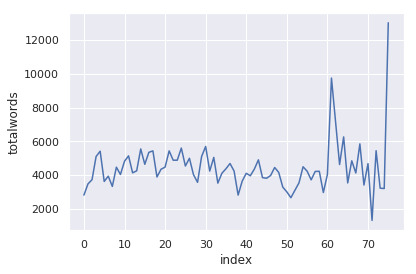

In [77]:
#Plotting number of words by episode
sns.lineplot(x="index", y="totalwords",
legend="full", data=df);

In [0]:
#ok, there are some prblems to resolve:
#-In season 7-8 there are two episodes with to many words
#-In season 7-8 there is an episode with to few words

In [0]:
#But first, lets see a simple comparison between rating and number of words

route = '/content/drive/My Drive/Colab Notebooks/Project_NLP/'
bd_name =  "rating_bd.csv"

df_rating = pd.read_csv(route + bd_name)

In [80]:
df_rating.dtypes

Unnamed: 0      int64
index           int64
Season          int64
Episode         int64
Title          object
Rating        float64
dtype: object

In [0]:
#Merging the two databases
df3 = pd.merge(df,
                 df_rating,
                 on=['Season' , 'Episode'],
                 how='inner')

In [0]:
df3 = df3[['Season','Episode','totalwords','Script','Title','Rating']]

In [0]:
#Sorting and reseting the index
df3.sort_values(['Season' , 'Episode'])
#reseting the index
df3 = df3.reset_index()


Correlation: 0.09119982384205727


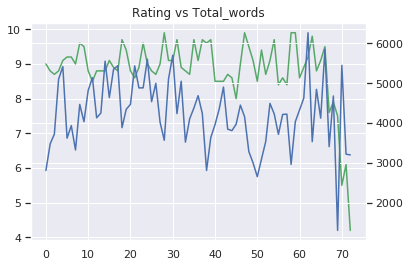

In [84]:
import matplotlib.pyplot as plt
sns.lineplot(data=df3.Rating, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df3.totalwords, color="b", ax=ax2)



plt.title('Rating vs Total_words')

correllation = df3['totalwords'].corr(df3['Rating'])
print ("Correlation: " +str(correllation))



df3.Rating

Correlation: -0.19039906460298858


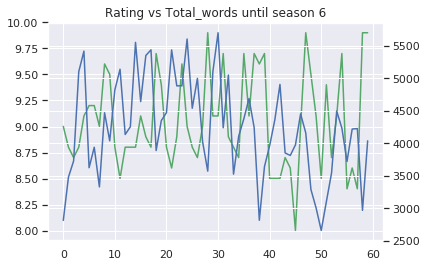

In [85]:
#Plotting only until season 6
df4 = df3[df3.Season<=6]

sns.lineplot(data=df4.Rating, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df4.totalwords, color="b", ax=ax2)

plt.title('Rating vs Total_words until season 6')

correllation = df4['totalwords'].corr(df4['Rating'])
print ("Correlation: " +str(correllation))




Correlation: -0.23776875366043118


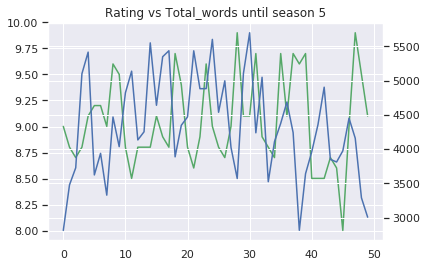

In [86]:
#Plotting only until season 5
df4 = df3[df3.Season<=5]

sns.lineplot(data=df4.Rating, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df4.totalwords, color="b", ax=ax2)

plt.title('Rating vs Total_words until season 5')

correllation = df4['totalwords'].corr(df4['Rating'])
print ("Correlation: " +str(correllation))

Correlation: -0.34282891868291626


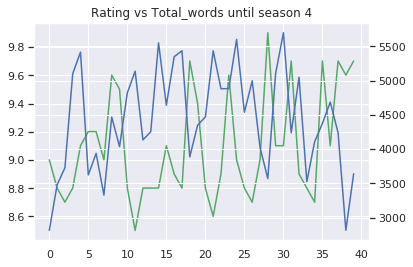

In [87]:
#Plotting only until season 4
df4 = df3[df3.Season<=4]

sns.lineplot(data=df4.Rating, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df4.totalwords, color="b", ax=ax2)

plt.title('Rating vs Total_words until season 4')

correllation = df4['totalwords'].corr(df4['Rating'])
print ("Correlation: " +str(correllation))

### OK, there is a lot of noise in the Scripts:

#### Scripts must be cleaned:


-Some scripts have a lot of descriptions of the scene

-Others scripts includes the name of the character who is talking.

### 1.-Trying to capture messages inside parentheses

There are a lot of scripts with messages inside parentheses 
describing actions of the chracaters. 

In [0]:
import re

In [0]:
#patterb to find all the messages inside parentheses:
pattern = "\(.+?\)"
#and also messages into brackets
pattern2 = "\[.+?\]"



df3['Script_2'] = df3['Script'].apply(lambda x: re.sub(pattern,'', str(x)))
df3['Script_2'] = df3['Script_2'].apply(lambda x: re.sub(pattern2,'', str(x)))



In [0]:
#Removing all the special characters
pattern3 = '[^a-zA-Z0-9- ]+'
df3['Script_3'] = df3['Script_2'].apply(lambda x: re.sub(pattern3,'', str(x)))

#To Lower
df3['Script_3'] = df3['Script_3'].str.lower()

In [0]:
## IS HODOR THE KEY OF EVERYTHING?

## IS HODOR THE KEY OF EVERYTHING?

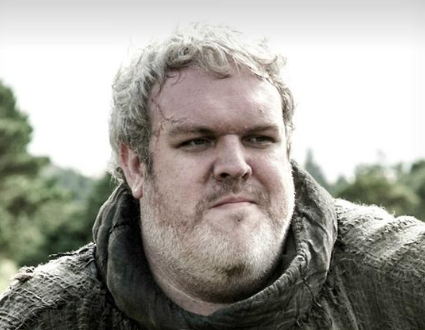

In [92]:
from IPython.display import Image
Image('/content/drive/My Drive/Colab Notebooks/Project_NLP/hodor.png', width=250, height=250)
#![title](img/picture.png)

###Plotting some word frequency

9


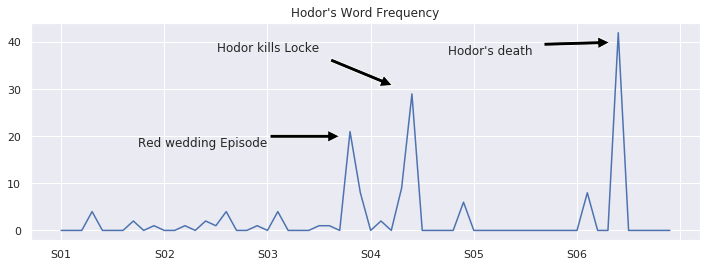

In [93]:
#Is Hodor the key of everything?

df3['hodor'] = df3.Script_3.str.count('hodor')
fig, ax = plt.subplots(figsize=(12, 4))

fig.canvas.draw()
df4 = df3[df3.Season<=6]


#Plotting only until season 6

sns.lineplot(data=df4.hodor, color="b")

#plt.ylim(0, 50)

plt.title("Hodor's Word Frequency")




ax.annotate("Hodor's death", xy=(54, 40),  xycoords='data',
           xytext=(0.75, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.10),
            horizontalalignment='right', verticalalignment='top',
            )


ax.annotate("Red wedding Episode", xy=(27, 20),  xycoords='data',
            xytext=(20, 20), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.000001),
            horizontalalignment='right', verticalalignment='top',
            )


ax.annotate("Hodor kills Locke", xy=(33, 30),  xycoords='data',
            xytext=(25, 40), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.11),
            horizontalalignment='right', verticalalignment='top',
            )

#ax.locator_params(axis='x', nbins=20)

labels = [item for item in ax.get_xticklabels()]
#labels[3] = 'Testing'
#ax.set_xticklabels(labels)



ax.set_xticks([0,10,20,30,40,50,60])
ax.set_xticklabels(['S01','S02','S03','S04','S05','S06'])

print(len(labels))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0.5, 1.0, 'Rating vs Hodor')

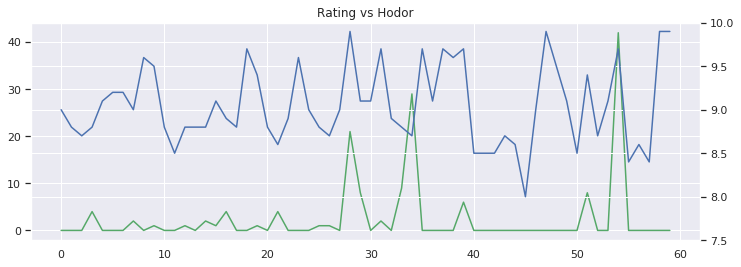

In [94]:
#Is Hodor the key of everithing?
fig, ax = plt.subplots(figsize=(12, 4))
df4 = df3[df3.Season<=6]
df4['hodor'] = df4.Script_3.str.count('hodor')

#Plotting only until season 6

sns.lineplot(data=df4.hodor, color="g")

#plt.ylim(0, 50)
ax2 = plt.twinx()
sns.lineplot(data=df4.Rating, color="b", ax=ax2)
plt.ylim(7.5, 10)

plt.title('Rating vs Hodor')


#ax.annotate("hola" ,(1,))


#### NLP processing

In [0]:
import nltk
from nltk.tokenize import word_tokenize
#Tokenization:

df3['tokenized_script'] = df3.apply(lambda row: nltk.word_tokenize(row['Script_3']), axis=1)

#Counting the number of words

#df3['len_ts'] = df3.apply(lambda row: len(row['tokenized_script']), axis=1)

#Creating Texts from tokenized scrit:

#df3['text_nltk'] = df3.apply(lambda row: nltk.Text(row['tokenized_script']), axis=1)


#df3['totalwords'].to_string().split()
#df3.head(5)

#All Scripts to a single string
all_scripts = ' '.join(df3['Script_3'].tolist())

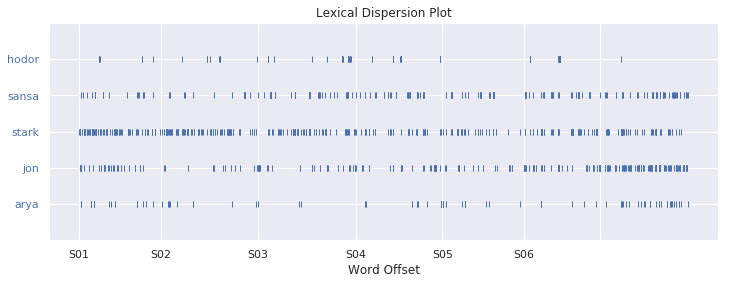

In [96]:
#Tokenization

scripts_token = nltk.word_tokenize(all_scripts)

#Creating text from tokenization
scripts_text = nltk.Text(scripts_token)

#Dispersion plot
fig, ax = plt.subplots(figsize=(12, 4))


#X axis:

x_ticks = df3['totalwords'].tolist()

#Calculating the accumulative sum

import numpy as np

x_ticks = np.cumsum(x_ticks)

#Inserting '0' element into the numpy array
x_ticks = np.insert(x_ticks, 0, 0, axis=0)

#subsetting every 10 element

x_ticks = x_ticks[0::10]

ax.set_xticks(x_ticks)
ax.set_xticklabels(['S01','S02','S03','S04','S05','S06'])

scripts_text.dispersion_plot(['hodor','sansa','stark','jon','arya'])

## Counting the most frequently words and bigrams

In [97]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = BigramCollocationFinder.from_words(scripts_text)
finder.nbest(bigram_measures.pmi, 10)  # doctest: +NORMALIZE_WHITESPACE


[('12000', 'infantrymen'),
 ('143', 'mazins'),
 ('212', 'supplicants'),
 ('22', '23'),
 ('28', '29'),
 ('35', 'hearths'),
 ('above-average', 'intelligence'),
 ('alchemists', 'guild'),
 ('andalish', 'sours'),
 ('annulled', 'rhaegars')]

In [98]:
#fdist1.most_common(50)
finder.nbest(bigram_measures.pmi, 10)


finder.apply_freq_filter(5)
finder.nbest(bigram_measures.pmi, 30) 

[('xhoan', 'daxos'),
 ('torgo', 'nudho'),
 ('salladhor', 'saan'),
 ('demon', 'monkey'),
 ('xaro', 'xhoan'),
 ('deepwood', 'motte'),
 ('lemon', 'cakes'),
 ('torrhens', 'square'),
 ('moat', 'cailin'),
 ('jaqen', 'hghar'),
 ('rhaego', 'rhaego'),
 ('oysters', 'clams'),
 ('weep', 'oer'),
 ('ilyn', 'payne'),
 ('daario', 'naharis'),
 ('cockles', 'oysters'),
 ('moles', 'town'),
 ('rains', 'weep'),
 ('tansy', 'tansy'),
 ('flea', 'bottom'),
 ('grey', 'worm'),
 ('hill', 'tribes'),
 ('qhorin', 'halfhand'),
 ('valar', 'morghulis'),
 ('valar', 'dohaeris'),
 ('llyn', 'payne'),
 ('fucks', 'sake'),
 ('barristan', 'selmy'),
 ('horn', 'hill'),
 ('elia', 'martell')]

In [99]:
scripts_text.collocations(num=30,window_size=2)

kings landing; seven kingdoms; nights watch; jon snow; castle black;
dont know; casterly rock; iron throne; shame shame; lord commander;
dont want; white walkers; ser davos; iron islands; hodor hodor; small
council; high sparrow; ned stark; lord baelish; tywin lannister; mhysa
mhysa; doesnt matter; robb stark; narrow sea; grand maester; dont
care; iron bank; grey worm; dont think; stannis baratheon


In [100]:
!pip install afinn

## Basic Sentiment Analysis using a dictionary approach

In [0]:
#loading dictionary 
route = '/content/drive/My Drive/Colab Notebooks/Project_NLP/'

affin_dict = pd.read_csv(route + 'AFINN-111.txt',sep='\t' , header=None)

affin_dict.rename(columns={0: "word", 1: "score"}, inplace=True)



In [0]:
#Transforming the data into "long shape"



df3_long = df3[['Season','Episode','tokenized_script']]

#df3_long = df3_long[(df3_long['Season']==1)]

df3_long = df3_long.tokenized_script.apply(pd.Series) \
    .merge(df3_long, right_index = True, left_index = True) \
    .drop(["tokenized_script"], axis = 1) \
    .melt(id_vars = ['Season', 'Episode'], value_name = "words")\
    .drop("variable", axis = 1)

In [0]:
#Creating positive and negative dict
pos_affin = affin_dict[(affin_dict['score'])>0]
neg_affin =  affin_dict[(affin_dict['score'])<0]



#Merging positive words
df3_long_2 = pd.merge(df3_long, pos_affin,how='left', left_on='words', right_on='word')
df3_long_2.rename(columns={"score": "pos"}, inplace=True)
df3_long_2 = df3_long_2.drop(["word"], axis = 1) 

#Merging negative words
df3_long_2 = pd.merge(df3_long_2, neg_affin,how='left', left_on='words', right_on='word')
df3_long_2.rename(columns={"score": "neg"}, inplace=True)
df3_long_2 = df3_long_2.drop(["word"], axis = 1) 





#Sentiment indicators:

In [0]:
#Creating indicators by Season-Episode


#Sum and count for positive and negative valuations:

got_indicators = df3_long_2.groupby(['Season' , 'Episode'], as_index=False)['pos','neg'].agg(['sum','count'])

got_indicators = got_indicators.reset_index()

#Indicator 1,  (number of pos - number of neg) / total_words"

got_indicators['ind1'] = (got_indicators['pos']['count'] -  got_indicators['neg']['count']) / (got_indicators['pos']['count'] + got_indicators['neg']['count'])

#Indicator 2 : number of pos - number of neg

got_indicators['ind2'] = (got_indicators['pos']['count'] -  got_indicators['neg']['count']) 

#Indicator 3 : sum of pos words - sum of neg words  / sum (pos+neg)

got_indicators['ind3'] = (got_indicators['pos']['sum'] +  got_indicators['neg']['sum']) / (got_indicators['pos']['count'] + got_indicators['neg']['count'])

#Indicator 4 : sum of pos words - sum of neg words  

got_indicators['ind4'] = (got_indicators['pos']['sum'] +  got_indicators['neg']['sum'])


#Normalized indicators

min_ind1 = got_indicators['ind1'].min()
min_ind2 = got_indicators['ind2'].min()
min_ind3 = got_indicators['ind3'].min()
min_ind4 = got_indicators['ind4'].min()


max_ind1 = got_indicators['ind1'].max()
max_ind2 = got_indicators['ind2'].max()
max_ind3 = got_indicators['ind3'].max()
max_ind4 = got_indicators['ind4'].max()



got_indicators['ind1_n'] = ( got_indicators['ind1'] - min_ind1 ) / (max_ind1 - min_ind1)
got_indicators['ind2_n'] = ( got_indicators['ind2'] - min_ind2 ) / (max_ind2 - min_ind2)
got_indicators['ind3_n'] = ( got_indicators['ind3'] - min_ind3 ) / (max_ind3 - min_ind3)
got_indicators['ind4_n'] = ( got_indicators['ind4'] - min_ind4 ) / (max_ind4 - min_ind4)



got_indicators.columns = [' '.join(col).strip() for col in got_indicators.columns.values]






#This is called unity-based normalization. If you have a vector X, you can obtain a normalized version of it, say Z, by doing:

#Z=X−min(X)max(X)−min(X)
#shareimprove this answer



In [0]:
#Merging with rating databse:

got_indicators = pd.merge(got_indicators, df_rating,how='left', on = ['Season','Episode'])



correllation: -0.057355921631513776


[Text(0.0, 0, 'S01'),
 Text(39929.0, 0, 'S02'),
 Text(87487.0, 0, 'S03'),
 Text(134993.0, 0, 'S04'),
 Text(177371.0, 0, 'S05'),
 Text(217134.0, 0, 'S06')]

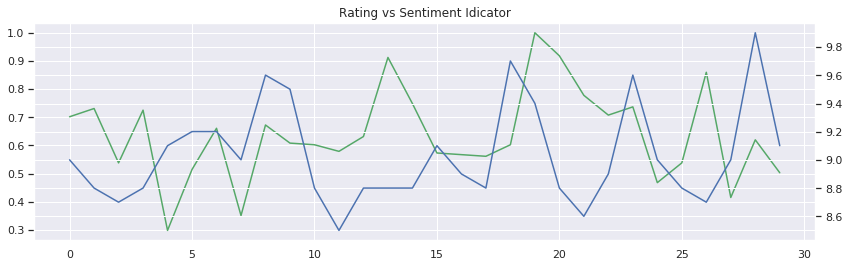

In [106]:

#fig, ax = plt.subplots(figsize=(14, 4))

plt.figure(figsize=(14,4))

#Last season:
last_season = 4
got_indicators = got_indicators[got_indicators.Season<last_season]


#Plotting only until season 6



sns.lineplot(data=got_indicators.ind2_n, color="g")

#plt.ylim(0, 50)
ax3 = plt.twinx()
sns.lineplot(data=got_indicators.Rating, color="b", ax=ax3)


#plt.ylim(7.5, 10)

plt.title('Rating vs Sentiment Idicator')


#ax.annotate("hola" ,(1,))

print( "correllation: "  + str(got_indicators['ind2_n'].corr(got_indicators['Rating'])) )



ax.set_xticks([0,10,20,30,40,50,60])
ax.set_xticklabels(['S01','S02','S03','S04','S05','S06'])


In [107]:
got_indicators.head(2)

,Season,Episode,pos sum,pos count,neg sum,neg count,ind1,ind2,ind3,ind4,ind1_n,ind2_n,ind3_n,ind4_n,Unnamed: 0,index,Title,Rating
0,1,1,189.0,106,-242.0,105,0.004739,1,-0.251185,-53.0,0.684517,0.701754,0.599231,0.677033,0,0,Winter Is Coming,9.001235
1,1,2,246.0,128,-239.0,122,0.024000,6,0.028000,7.0,0.724807,0.730994,0.852947,0.820574,1,1,The Kingsroad,8.801235


In [108]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [109]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True